In [1]:
!pip install -q pingouin==0.5.5

import numpy as np
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt

import itertools
from utils import validate_plot_config, plot_regression_and_heatmap_plots # Plotting utilities

# Set the random seed for reproducibility
np.random.seed(42)

# Create an underlying variable Z that influences both X and Y
Z = np.random.normal(loc=10, scale=2, size=30)
# Generate X and Y based on Z with added noise
X = 10 * Z + np.random.normal(loc=0, scale=10, size=30)
Y = 20 * Z + np.random.normal(loc=1, scale=10, size=30)

# Combine into a DataFrame
data = pd.DataFrame(dict(X=X, Y=Y, Z=Z))
data = data.apply(lambda x: round(x, 1))
data.head(5)

,X,Y,Z
0,103.9,216.1,11.0
1,115.8,193.6,9.7
2,112.8,215.8,11.3
3,119.9,250.0,13.0
4,103.5,199.8,9.5


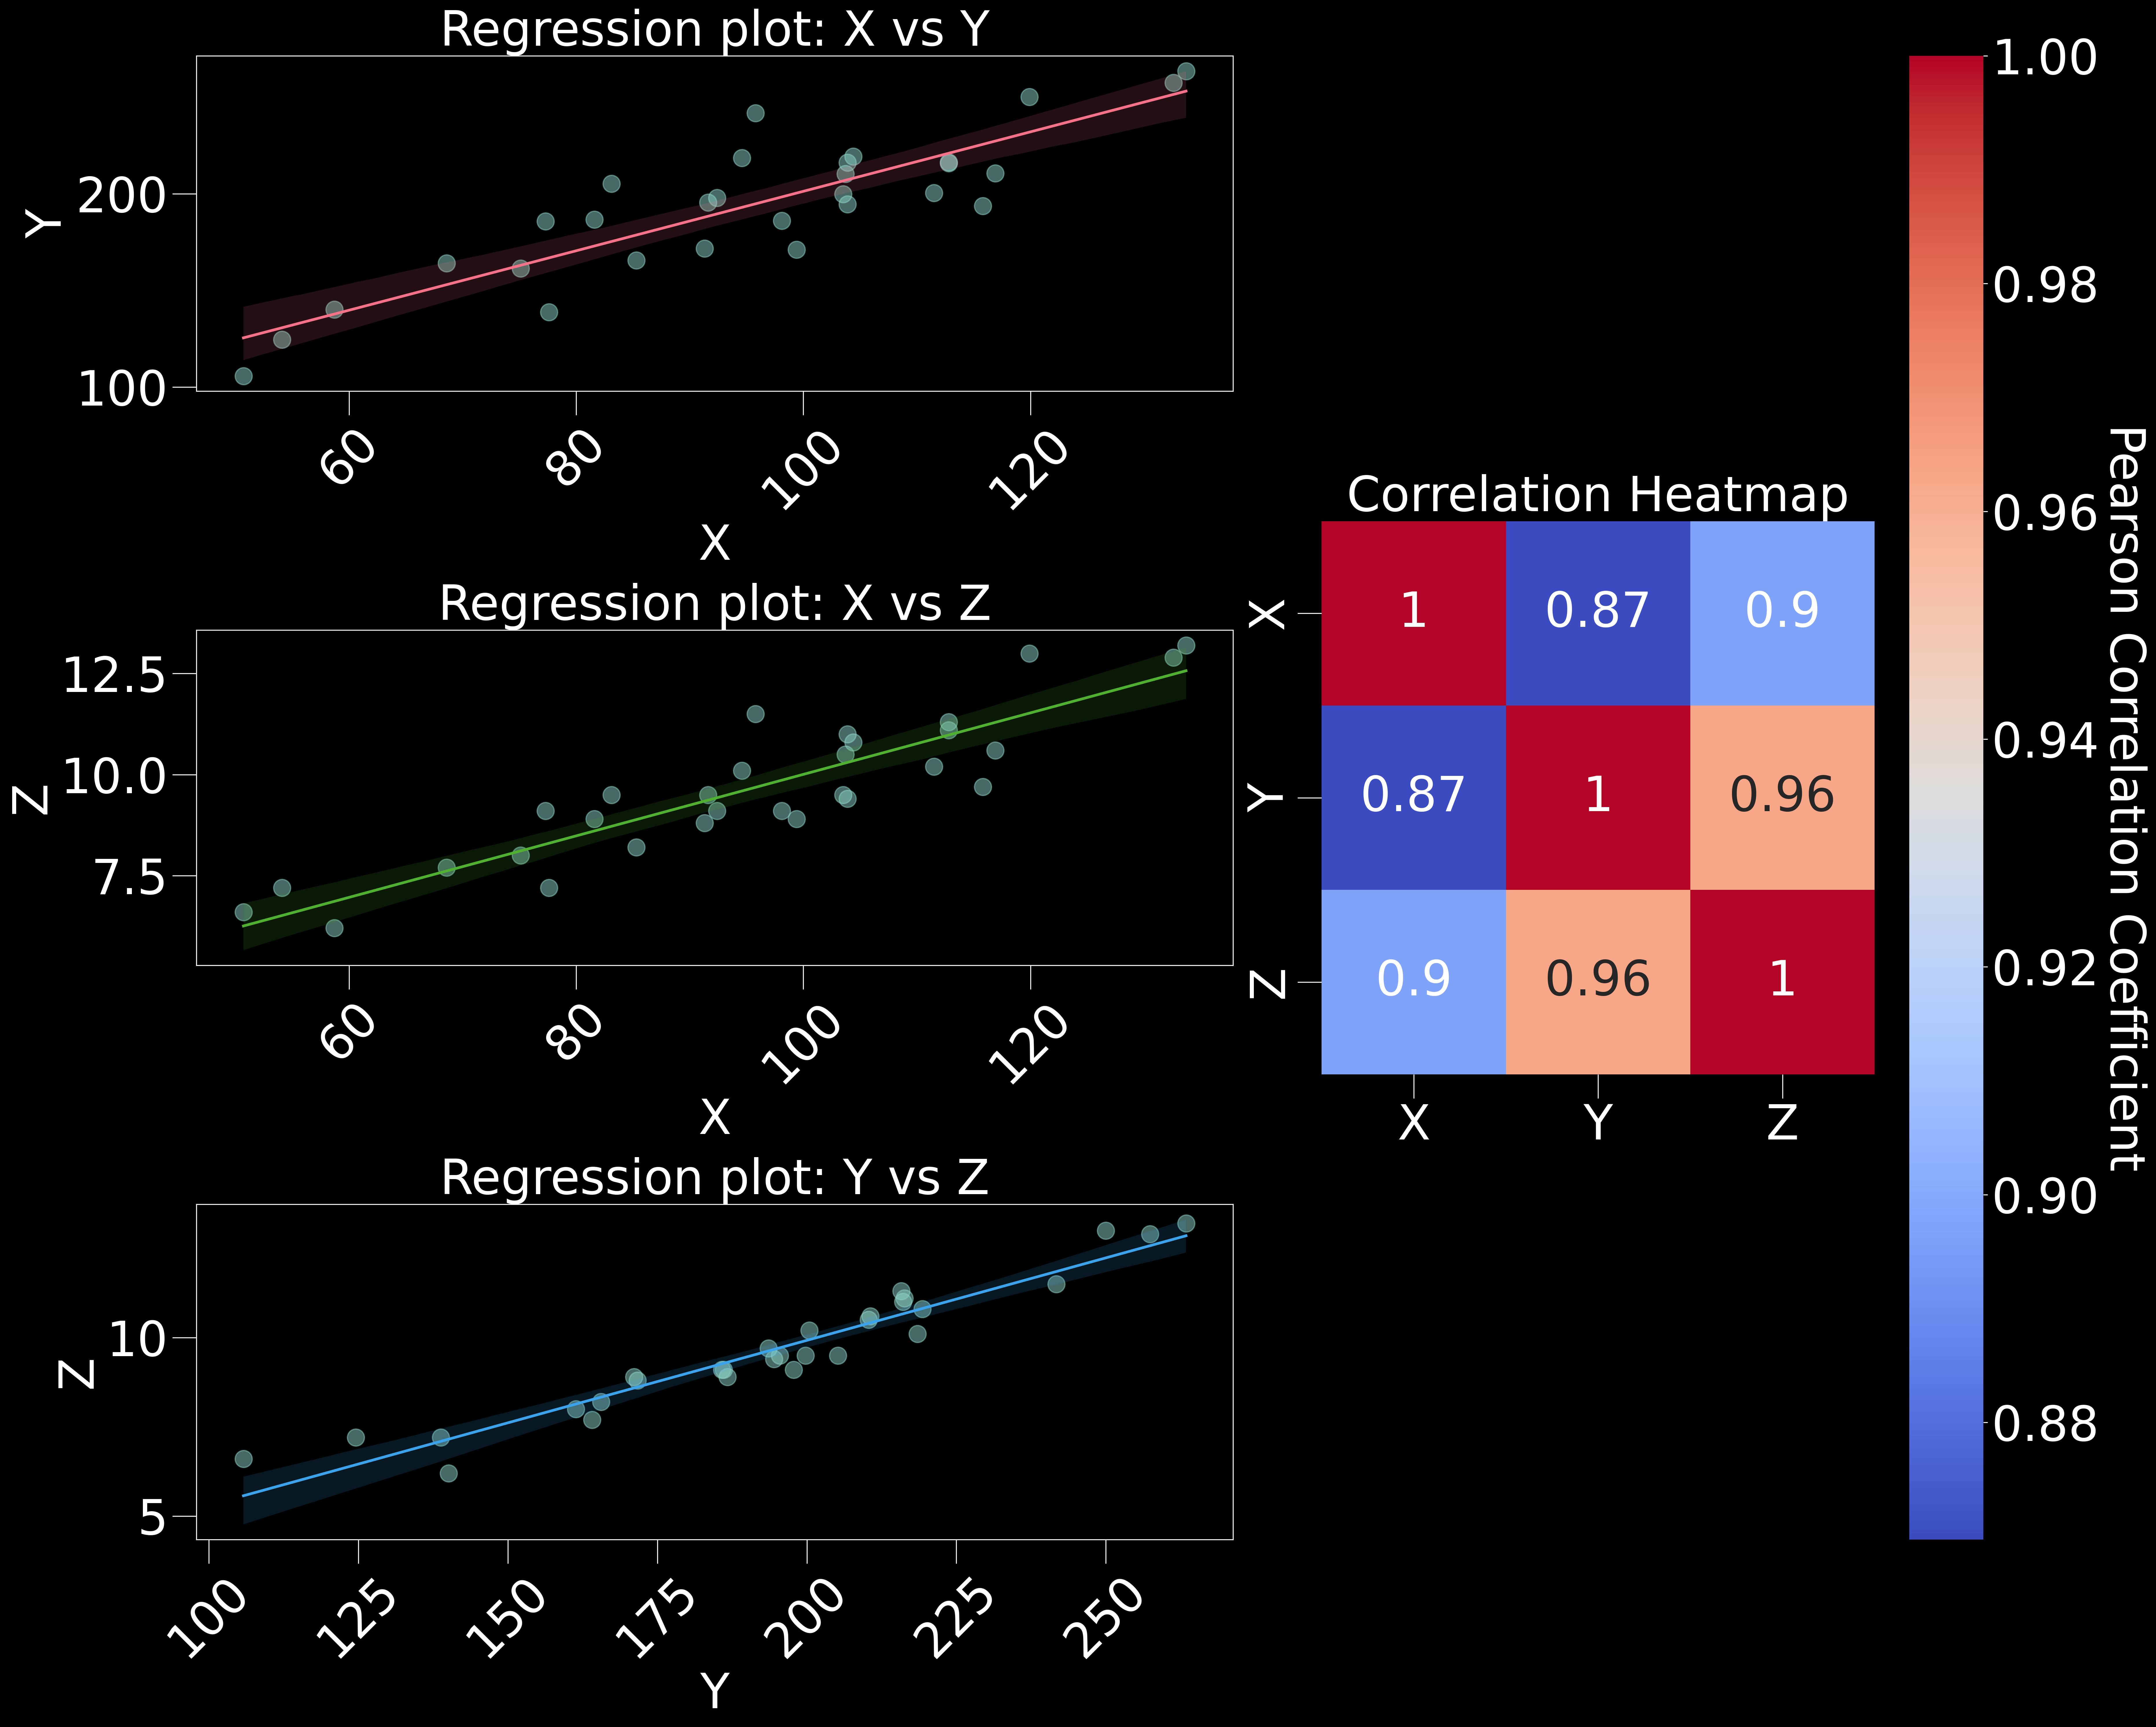

In [2]:
plt.style.use('dark_background')
pairs = list(itertools.combinations(data.columns, 2))
save_path = 'reg_heatmap_plots.png'
validate_plot_config(pairs, data, save_path)
fig = plot_regression_and_heatmap_plots(pairs, data, save_path)

In [3]:
# Pearson's Correlation Coefficient of X and Y
pearson_corr = data[['X', 'Y']].corr().iloc[0, 1]
print(f"""
Pearson's Correlation Coefficient between X and Y: {pearson_corr:.2f}
""")
# Partial correlation coefficient between X and Y, controlling for Z
partial_corr_coefficient = pg.partial_corr(data=data, x='X', 
                                           y='Y', covar='Z', 
                                           method='pearson')
print(f"""Partial Correlation Coefficient b/w X and Y, controllling for Z: 
{partial_corr_coefficient["r"].values[0]:.3f}
""")


Pearson's Correlation Coefficient between X and Y: 0.87

Partial Correlation Coefficient b/w X and Y, controllling for Z: 
0.047



# Conclusion

The Pearson's correlation coefficient between `X` and `Y` is relatively high, suggesting a strong relationship. 
<br> <br>
However, after calculating the partial correlation between `X` and `Y` while controlling for `Z`, we see that the correlation significantly weakens. <br> <br>  This indicates that `X` and `Y` are spuriously correlated due to their mutual dependence on `Z`.